<a href="https://colab.research.google.com/github/QorryTarania/Pengaruh-Jenis-Promo-Terhadap-Loyalitas-Pelanggan/blob/main/Qorry_Tarania_Muntadz_11220940000017_Manova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pengaruh Jenis Promo Terhadap Loyalitas Pelanggan
Qorry Tarania Muntadz

# Install dan Import Library

In [18]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 16.3 MB/s eta 0:00:00


In [44]:
!pip install --upgrade pingouin

In [19]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import chi2
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Dalam dunia bisnis, promosi adalah salah satu cara untuk menarik perhatian pelanggan. Di penelitian ini, akan dilihat bagaimana perbandingan dari tiga jenis promo—Gratis Ongkir, Cashback, dan Diskon Produk—mempengaruhi loyalitas pelanggan. Dengan menganalisis data pengeluaran, frekuensi belanja, dan persentase repeat order, akan diperoleh jenis promo mana yang paling efektif dalam membuat pelanggan kembali berbelanja.



In [59]:
data_manova = pd.read_csv("/content/Dataa.csv")
data_manova

,Pengeluaran_per_Bulan,Frekuensi_Belanja,Persentase_Repeat_Order,Jenis_Promo
0,"Rp750,657",4,46.1,Gratis Ongkir
1,"Rp545,394",5,46.8,Gratis Ongkir
2,"Rp534,157",5,38.8,Gratis Ongkir
3,"Rp741,488",5,48.7,Gratis Ongkir
4,"Rp801,608",7,60.3,Gratis Ongkir
...,...,...,...,...
463,"Rp1,726,025",9,69.5,Diskon Produk
464,"Rp895,984",9,73.3,Diskon Produk
465,"Rp1,444,596",10,91.1,Diskon Produk
466,"Rp1,139,876",10,82.8,Diskon Produk


## Uji Normalitas Multivariat

In [60]:
data_gratong = data_manova.loc[data_manova['Jenis_Promo'] == 'Gratis_Ongkir', [' Pengeluaran_per_Bulan ', 'Frekuensi_Belanja', 'Persentase_Repeat_Order']]
data_cashback = data_manova.loc[data_manova['Jenis_Promo'] == 'Cashback', [' Pengeluaran_per_Bulan ', 'Frekuensi_Belanja', 'Persentase_Repeat_Order']]
data_diskon = data_manova.loc[data_manova['Jenis_Promo'] == 'Diskon_Produk', [' Pengeluaran_per_Bulan ', 'Frekuensi_Belanja', 'Persentase_Repeat_Order']]

In [61]:
# Memisahkan data per kelompok hanya untuk variabel dependen
data_gratong = df[df['Jenis_Promo'] == 'Gratis Ongkir'][['Pengeluaran_per_Bulan', 'Frekuensi_Belanja', 'Persentase_Repeat_Order']].values
data_cashback = df[df['Jenis_Promo'] == 'Cashback'][['Pengeluaran_per_Bulan', 'Frekuensi_Belanja', 'Persentase_Repeat_Order']].values
data_diskon = df[df['Jenis_Promo'] == 'Diskon Produk'][['Pengeluaran_per_Bulan', 'Frekuensi_Belanja', 'Persentase_Repeat_Order']].values

In [62]:
print("Gratis_Ongkir:", pg.multivariate_normality(data_gratong, alpha=0.05))
print("Cashback:", pg.multivariate_normality(data_cashback, alpha=0.05))
print("Diskon_Produk:", pg.multivariate_normality(data_diskon, alpha=0.05))

Gratis_Ongkir: HZResults(hz=np.float64(0.7264902417971055), pval=np.float64(0.5478873885863255), normal=True)
Cashback: HZResults(hz=np.float64(0.5402301572584103), pval=np.float64(0.9543546723400667), normal=True)
Diskon_Produk: HZResults(hz=np.float64(0.9850869799112483), pval=np.float64(0.06787744512328771), normal=True)


Data sudah berdistribusi normal multivariat, jadi tidak perlu dilakukan transformasi data

## Uji Homogenitas

In [63]:
#Uji Homogenitas
pg.box_m(data_manova, dvs=[' Pengeluaran_per_Bulan ', 'Frekuensi_Belanja', 'Persentase_Repeat_Order'], group='Jenis_Promo')

,Chi2,df,pval,equal_cov
box,66.332387,6.0,2.304837e-12,False


Karena P-value = 2.304837e-12	< 0.05, maka data tidak homogen antar jenis promo

## MANOVA

Karena pada uji Homogenitas menunjukkan heterogenitas matriks varians-kovarians, maka dipilih **Pillai's Trace** dalam MANOVA karena lebih robust terhadap asumsi ini (Tidak homogen)

In [66]:
from statsmodels.multivariate.manova import MANOVA

model = MANOVA.from_formula(
    'Pengeluaran_per_Bulan + Frekuensi_Belanja + Persentase_Repeat_Order ~ Jenis_Promo',
    data=df
)
print(model.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0364 3.0000 463.0000 4091.3214 0.0000
         Pillai's trace  0.9636 3.0000 463.0000 4091.3214 0.0000
 Hotelling-Lawley trace 26.5096 3.0000 463.0000 4091.3214 0.0000
    Roy's greatest root 26.5096 3.0000 463.0000 4091.3214 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Jenis_Promo       Value  Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.2318 6.0000 926.0000 166.2238 0.0000
           Pillai's trace 0.7730 6.0000 928.0

Ada perbedaan **sangat signifikan** dalam loyalitas konsumen (gabungan 3 variabel dependen) antar jenis promo.
Nilai Pillai's trace = **0.773** yang artinya nilai mendekati 1 menunjukkan efek kuat/pengaruh jenis promo besar.

##Uji Anova Multivariat

## Uji Post Hoc

Di sini akan diperiksa pasangan kelompok mana yang berbeda signifikan antar ketiganya (Variabel dependen)

In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for dv in ['Pengeluaran_per_Bulan', 'Frekuensi_Belanja', 'Persentase_Repeat_Order']:
    print(f"\n--- ANOVA untuk {dv} ---")
    tukey = pairwise_tukeyhsd(
        endog=df[dv],
        groups=df['Jenis_Promo'],
        alpha=0.05
    )
    print(tukey.summary())


--- ANOVA untuk Pengeluaran_per_Bulan ---
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
    group1        group2      meandiff   p-adj    lower        upper     reject
-------------------------------------------------------------------------------
     Cashback Diskon Produk  267612.5705   0.0  204809.4919  330415.6492   True
     Cashback Gratis Ongkir -343448.9817   0.0 -406252.0603  -280645.903   True
Diskon Produk Gratis Ongkir -611061.5522   0.0 -673864.6308 -548258.4735   True
-------------------------------------------------------------------------------

--- ANOVA untuk Frekuensi_Belanja ---
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
     Cashback Diskon Produk    1.359   0.0  0.9352  1.7827   True
     Cashback Gratis Ongkir  -2.3462   0.0 -2.7699 -1.9224   True
Diskon Produk Gratis Ongkir 

Dari hasil uji Post-Hoc diperoleh kesimpulan bahwa semua pasangan grup berbeda signifikan (p <0.05) untuk ketiga variabel dependen (Pengeluaran per Bulan, Frekuensi Belanja, Persentase Repeat Order).
Dan diperoleh urutan efektivitas promo : Diskon Produk > Cashback > Gratis Ongkir.

In [68]:
for dv in ['Pengeluaran_per_Bulan', 'Frekuensi_Belanja', 'Persentase_Repeat_Order']:
    aov = pg.anova(data=df, dv=dv, between='Jenis_Promo', detailed=True)
    ss_between = aov.at[0, 'SS']
    ss_total = aov['SS'].sum()
    eta_sq = ss_between / ss_total
    print(f"Effect Size (η²) untuk {dv}: {eta_sq:.3f}")

Effect Size (η²) untuk Pengeluaran_per_Bulan: 0.531
Effect Size (η²) untuk Frekuensi_Belanja: 0.482
Effect Size (η²) untuk Persentase_Repeat_Order: 0.596


Tujuan melakukan Uji Effect Size (n^2) untuk mengukur kekuatan pengaruh jenis promo. Dan hasil yang didapat nilai n^2 antara 0.482-0.596 yang artinya pengearuhnya cukup besar atau bisa juga diartikan sebanyak 48.2%-59.6% variasi loyalitas disebabkan oleh jneis promo.

## Visualisasi Data

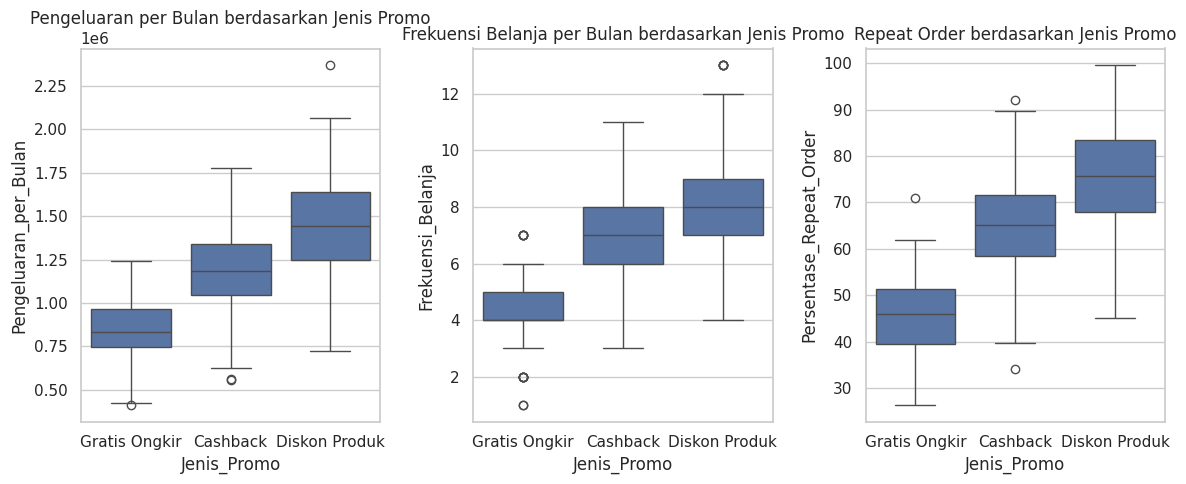

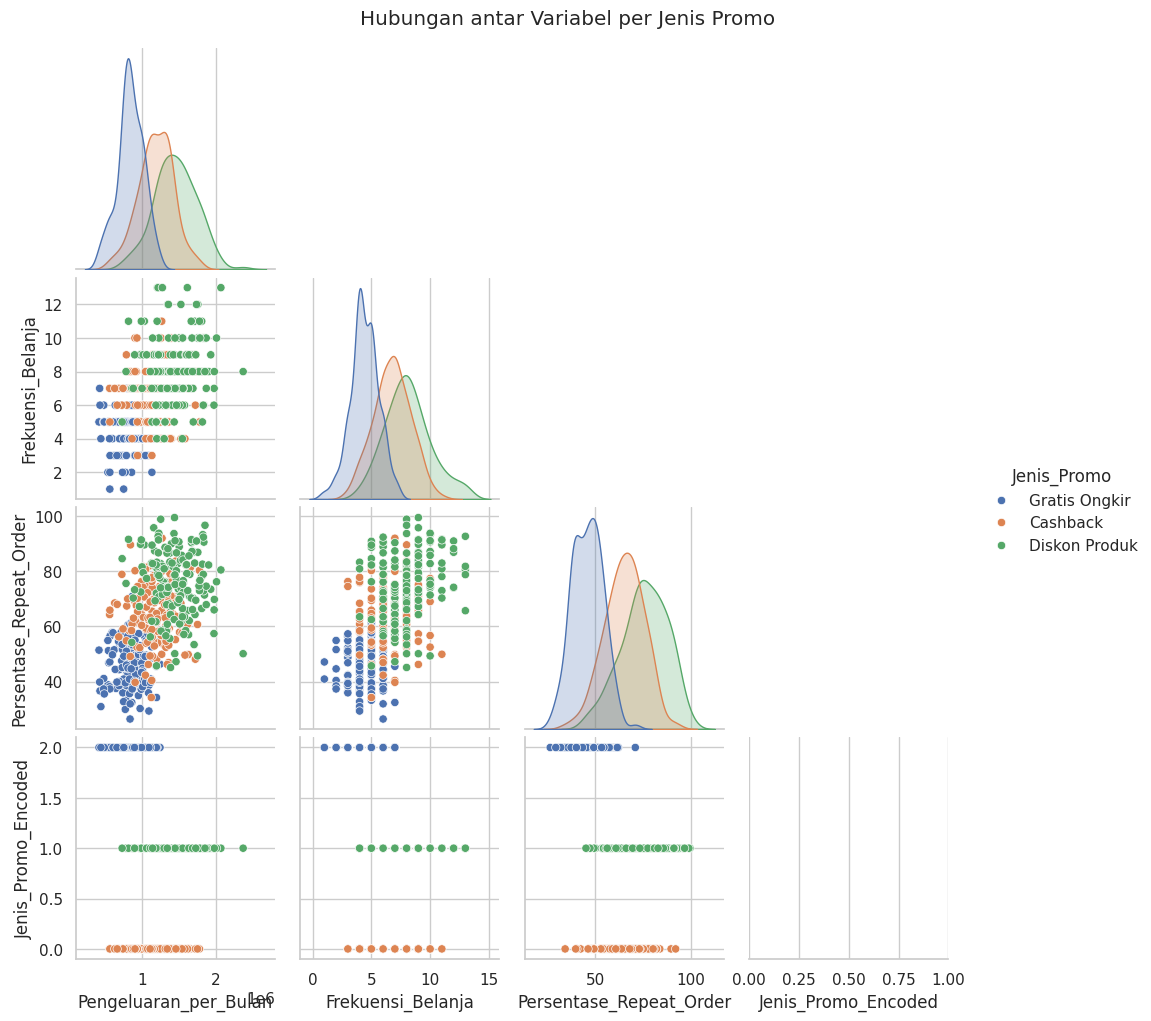

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# --- 1. Boxplot tiap variabel numerik berdasarkan jenis promo ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Jenis_Promo", y="Pengeluaran_per_Bulan", data=df)
plt.title("Pengeluaran per Bulan berdasarkan Jenis Promo")

plt.subplot(1, 3, 2)
sns.boxplot(x="Jenis_Promo", y="Frekuensi_Belanja", data=df)
plt.title("Frekuensi Belanja per Bulan berdasarkan Jenis Promo")

plt.subplot(1, 3, 3)
sns.boxplot(x="Jenis_Promo", y="Persentase_Repeat_Order", data=df)
plt.title("Repeat Order berdasarkan Jenis Promo")

plt.tight_layout()
plt.show()

# --- 2. Pairplot: hubungan antar variabel dengan hue jenis promo ---
sns.pairplot(df, hue="Jenis_Promo", diag_kind="kde", corner=True)
plt.suptitle("Hubungan antar Variabel per Jenis Promo", y=1.02)
plt.show()

Dari visualisasi diatas dapat diinterpretasikan bahwa:
*   Promo Diskon Produk cenderung memicu pengeluaran bulanan yang lebih tinggi dari konsumen dan membuat kosnumen lebih sering untuk berbelanja dan kembali berbelanja. jadi, jenis promo diskom berpengaruh signifikan terhadap loyalitas konsumen
*   Gratis Ongkir → loyalitas paling rendah dari ketiga jenis promo.

